Import libraries

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from fuzzywuzzy import process
import random
from langdetect import detect
from googletrans import Translator

Datasets importing

In [63]:
food=pd.read_csv('./Dataset/food.csv')

In [64]:
df=pd.read_csv("./Dataset/diet.csv")

In [65]:

food.describe()
food.isnull().sum()
food.duplicated().sum()

0

In [66]:
df.isnull().sum()
df.duplicated().sum()

2

In [67]:
df = df.drop(columns=['Price'])
df.drop(columns=['Meal_Id'], inplace=True)
df.dropna(subset=['description'], inplace=True)
df.duplicated().sum()
df.drop_duplicates(inplace=True)

Splitting testing

In [68]:
# Splitting features (X) and target variable (y)
X = food.drop(['Food_items'], axis=1)  # Features
y = food['Food_items']  # Target variable

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Split the data into training and testing sets
X = df.drop(columns=['Veg_Non'])  # Features
y = df['Veg_Non']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Clustering of veg-nonveg

In [70]:
food_items = food['Food_items'].tolist()

In [71]:
print(food['VegNovVeg'].unique())


[0 1]


In [72]:
# Convert 'VegNovVeg' to numerical values (1 for Non-Veg, 0 for Veg)
food['VegNovVeg'] = food['VegNovVeg'].apply(lambda x: 1 if x == 'Non-Veg' else 0)

In [73]:
# Define keywords for non-vegetarian foods
non_veg_keywords = ['Tuna', 'Chicken', 'Salmon', 'Goat', 'Rabbit', 'Pork', 'Bacon', 'Shrimp',
                    'Meatballs', 'Beef', 'Turkey', 'Oyster']

# Function to check if a food item contains non-vegetarian keywords
def is_non_veg(food_item):
    for keyword in non_veg_keywords:
        if keyword.lower() in food_item.lower():
            return True
    return False

# Add 'VegNonVeg' column to indicate whether the food item is vegetarian or non-vegetarian
food['VegNonVeg'] = food['Food_items'].apply(lambda x: 'Non-Veg' if is_non_veg(x) else 'Veg')


In [74]:

# Taking input of a food item
#input_food = input("Enter a food item: ")

# Performing fuzzy matching to find the closest match
matched_food = process.extractOne(input_food, food['Food_items'])

# Checking if the matched food item has a high enough similarity score
if matched_food[1] >= 80:  # You can adjust the threshold as needed
    matched_food_name = matched_food[0]
    veg_non_veg = food.loc[food['Food_items'] == matched_food_name, 'VegNonVeg'].values[0]
    print(f"'{input_food}' is  {veg_non_veg}")
else:
    print("No closely matched food item found in the dataset.")


'poha' is  Veg


In [75]:

food_list2 = df.loc[:, 'Name'].unique().tolist()
catagory_list = df['catagory'].unique().tolist()

In [76]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Veg_Non'] = label_encoder.fit_transform(df['Veg_Non'])

# Extract features
X = df[['Veg_Non']]

# Perform k-means clustering
k = 2  # number of clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Get cluster labels
cluster_labels = kmeans.labels_

# Assign cluster labels back to the DataFrame
df['Cluster'] = cluster_labels

cluster_names = {0: 'veg', 1: 'non-veg'}
df['Cluster'] = [cluster_names[label] for label in cluster_labels]

# Display the resulting DataFrame with cluster labels
#print(df[['Name', 'Veg_Non', 'Cluster']])

c:\Users\Gyatri C Gide\anaconda3\envs\goku\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Gyatri C Gide\anaconda3\envs\goku\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


                           Name  Veg_Non  Cluster
0           summer squash salad        1      veg
1          chicken minced salad        0  non-veg
2          sweet chilli almonds        1      veg
3               tricolour salad        1      veg
4    gluten-free christmas cake        1      veg
..                          ...      ...      ...
507                  sunga pork        0  non-veg
508                banana chips        1      veg
509                 bhurji- egg        0  non-veg
510       flattened rice / pohe        1      veg
511                 puffed rice        1      veg

[380 rows x 3 columns]


meal type

In [77]:
# Extracting features for each meal
breakfast_data = food[['Breakfast', 'Calories', 'Fats', 'Proteins', 'Iron']]
lunch_data = food[['Lunch', 'Calories', 'Fats', 'Proteins', 'Iron']]
dinner_data = food[['Dinner', 'Calories', 'Fats', 'Proteins', 'Iron']]

# Perform k-means clustering for each meal
kmeans_breakfast = KMeans(n_clusters=2, random_state=42)
kmeans_lunch = KMeans(n_clusters=2, random_state=42)
kmeans_dinner = KMeans(n_clusters=2, random_state=42)

# Fit k-means models
kmeans_breakfast.fit(breakfast_data)
kmeans_lunch.fit(lunch_data)
kmeans_dinner.fit(dinner_data)

# Adding cluster labels to the DataFrame for each meal
food['Breakfast_Cluster'] = kmeans_breakfast.labels_
food['Lunch_Cluster'] = kmeans_lunch.labels_
food['Dinner_Cluster'] = kmeans_dinner.labels_


c:\Users\Gyatri C Gide\anaconda3\envs\goku\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Gyatri C Gide\anaconda3\envs\goku\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Gyatri C Gide\anaconda3\envs\goku\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Gyatri C Gide\anaconda3\envs\goku\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: K

In [80]:
# Function to find the closest match
def find_closest_match(user_input, column_data):
    choices = column_data.unique()
    closest_match, _ = process.extractOne(user_input, choices)
    return closest_match

# Example user input
user_input_food_item = input("Enter a food item: ")  # Intentional typo to demonstrate fuzzy matching

# Finding closest match
closest_breakfast = find_closest_match(user_input_food_item, food['Food_items'])
closest_lunch = find_closest_match(user_input_food_item, food['Food_items'])
closest_dinner = find_closest_match(user_input_food_item, food['Food_items'])

# Check if the food item is used in breakfast, lunch, or dinner
if closest_breakfast in food['Food_items'].values:
    meal_type = "Breakfast"
elif closest_lunch in food['Food_items'].values:
    meal_type = "Lunch"
elif closest_dinner in food['Food_items'].values:
    meal_type = "Dinner"
else:
    meal_type = "Not found"

print(f"The food item '{user_input_food_item}' is typically used in {meal_type}.")

The food item 'coffee' is typically used in Breakfast.


Describtion of food

In [81]:
from langdetect import detect
from googletrans import Translator

def translate_description(description):
    if detect(description) != 'en':
        translator = Translator()
        translated = translator.translate(description, src='auto', dest='en')
        return translated.text
    else:
        return description

In [82]:
# Function to get the description of the food item
def get_description(food_item):
    # Check if the food item exists in the DataFrame using fuzzy matching
    matched_food = process.extractOne(food_item, df['Name'])

    # Check if any food item was matched
    if matched_food:
        matched_food_name = matched_food[0]
        score = matched_food[1]

        # Check if the matched food item has a high similarity score
        if score >= 80:  # You can adjust the threshold as needed
            # Get the description of the matched food item
            description = df.loc[df['Name'] == matched_food_name, 'description'].values[0]

            # Check if the description is in English
            if detect(description) != 'en':
                # Translate the description to English
                translated_description = translate_description(description)
                return translated_description
            else:
                return description
        else:
            return "Food item not found in the dataset"
    else:
        return "Food item not found in the dataset"

# Take user input for the food item
user_input = input("Enter a food item: ")
def translate_description(description):
    try:
        translator = Translator()
        translated = translator.translate(description, src='auto', dest='en')
        return translated.text
    except AttributeError as e:
        print("Translation error:", e)
        return None
    except Exception as e:
        print("An unexpected error occurred during translation:", e)
        return None


# Get the description of the user-inputted food item
description = get_description(user_input)
print("Description:", description)

Description: almond flakes, onion, poha, cranberries (frozen/ dried), salt, oil, curry leaves, green chilies, fresh coconut


Disease

In [83]:
def get_mealfordisease(df, disease_name):
    food_items = df.loc[df['Disease'].str.contains(disease_name), 'Name'].tolist()

    print(f"Meal List for {disease_name}:")
    print('-' * 20)  # Separator for better readability

    if food_items:
        if len(food_items) <= 10:
            for food_item in food_items:
                print(food_item)
        else:
            random_selection = random.sample(food_items, 10)
            for food_item in random_selection:
                print(food_item)

allergy

In [84]:
from googletrans import Translator
from langdetect import detect

def translate_description(description):
    translator = Translator()
    translated_text = translator.translate(description, src='auto', dest='en').text
    return translated_text

def get_mealforallergy(DisDif, Allergy):
    # Translate descriptions if they are not in English
    for index, row in df.iterrows():
        if detect(row['description']) != 'en':
            DisDif.at[index, 'description'] = translate_description(row['description'])

    # Filtering rows where translated 'description' does not contain the allergy
    matching_rows = df[~df['description'].str.contains(Allergy, case=False)]

    # If there are matching rows, print the list of food items
    if not matching_rows.empty:
        food_items = matching_rows['Name'].tolist()
        print(f"Food items where '{Allergy}' is not present in the Description:")
        print('-' * 20)
        if food_items:
            if len(food_items) <= 10:
                for food_item in food_items:
                    print(food_item)
            else:
                random_selection = random.sample(food_items, 10)
                for food_item in random_selection:
                    print(food_item)
    else:
        print(f"No food items found where '{Allergy}' is not present in the Description.")

user parameters

In [85]:
def calculate_bmr(age, weight_kg, height_m, gender):
    if gender.lower() == 'female':
        return 655 + (9.6 * weight_kg) + (1.8 * height_m * 100) - (4.7 * age)
    elif gender.lower() == 'male':
        return 66 + (13.7 * weight_kg) + (5 * height_m * 100) - (6.8 * age)
    else:
        raise ValueError("Invalid gender value")

def calculate_macros(weight, height, age, gender, activity_level, veg_nonveg):
    ree = calculate_bmr(age, weight, height, gender)

    activity_factors = {
        'sedentary': 1.2,
        'lightly active': 1.375,
        'moderately active': 1.55,
        'very active': 1.725,
        'extra active': 1.9
    }

    tdee = ree * activity_factors[activity_level.lower()]

    # Calculate macros based on percentages
    protein_percent = 0.3
    fat_percent = 0.25
    carb_percent = 1 - protein_percent - fat_percent

    # Adjust percentages based on vegetarian/non-vegetarian preference
    if veg_nonveg.lower() == 'veg':
        protein_percent = 0.25  # Adjust protein percentage for vegetarian
    elif veg_nonveg.lower() == 'nonveg':
        protein_percent = 0.35  # Adjust protein percentage for non-vegetarian

    protein_calories = protein_percent * tdee
    fat_calories = fat_percent * tdee
    carb_calories = carb_percent * tdee

    protein_grams = protein_calories / 4  # 1 gram of protein = 4 calories
    fat_grams = fat_calories / 9  # 1 gram of fat = 9 calories
    carb_grams = carb_calories / 4  # 1 gram of carb = 4 calories

    # Calculate water intake recommendation based on activity level
    if activity_level.lower() == 'sedentary':
        water_intake_ml = weight * 30  # 30 ml per kg of body weight per day
    elif activity_level.lower() == 'lightly active':
        water_intake_ml = weight * 35  # 35 ml per kg of body weight per day
    elif activity_level.lower() == 'moderately active':
        water_intake_ml = weight * 40  # 40 ml per kg of body weight per day
    elif activity_level.lower() == 'very active':
        water_intake_ml = weight * 45  # 45 ml per kg of body weight per day
    elif activity_level.lower() == 'extra active':
        water_intake_ml = weight * 50  # 50 ml per kg of body weight per day
    else:
        raise ValueError("Invalid activity level")

    # Calculate calorie intake
    calorie_intake = tdee

    return {
        'TDEE': tdee,
        'protein': protein_grams,
        'fat': fat_grams,
        'carbs': carb_grams,
        'water': water_intake_ml
    }

def get_user_input():
    weight = float(input("Enter your weight in kg: "))
    height = float(input("Enter your height in meters: "))
    age = int(input("Enter your age in years: "))
    gender = input("Enter your gender (male/female): ")
    veg_nonveg = input("Are you vegetarian or non-vegetarian? (veg/nonveg): ")
    # Printing activity level options
    print("\nSelect your activity level:")
    activity_level_options = {
        '1': 'sedentary',
        '2': 'lightly active',
        '3': 'moderately active',
        '4': 'very active',
        '5': 'extra active'
    }

    for key, value in activity_level_options.items():
        print(f"{key}: {value.capitalize()}")

    activity_choice = input("\nEnter the number corresponding to your activity level: ")

    if activity_choice in activity_level_options:
        activity_level = activity_level_options[activity_choice]
    else:
        raise ValueError("Invalid activity level choice")

    return weight, height, age, gender, activity_level, veg_nonveg

def display_macros(macros):
    print("\nRecommended nutrition intake:")
    print("TDEE:", macros['TDEE'])
    print("Recommended Protein intake (g):", macros['protein'])
    print("Recommended Fat intake (g):", macros['fat'])
    print("Recommended Carbohydrate intake (g):", macros['carbs'])
    print("Recommended Water intake (ml):", macros['water'])

# Taking user input
weight, height, age, gender, activity_level, veg_nonveg = get_user_input()

# Calculating macros
macros = calculate_macros(weight, height, age, gender, activity_level, veg_nonveg)

# Print the calculated values
display_macros(macros)



Select your activity level:
1: Sedentary
2: Lightly active
3: Moderately active
4: Very active
5: Extra active

Recommended nutrition intake:
TDEE: 4300.320000000001
Recommended Protein intake (g): 268.77000000000004
Recommended Fat intake (g): 119.45333333333335
Recommended Carbohydrate intake (g): 483.786
Recommended Water intake (ml): 3200.0


In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the data into features and target variable
X = food[['Calories', 'Proteins', 'Fats', 'Carbohydrates']]  # Features
y = food.index  # Target variable (index)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN classifier
k = 1  # number of neighbors to consider
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict the index for the test set
y_pred = knn.predict(X_test)


In [91]:
import random

def calculate_sums(random_sets):
    sums = {'Calories': 0, 'Proteins': 0, 'Fats': 0, 'Carbohydrates': 0}
    for set_values in random_sets:
        for i, nutrient in enumerate(['Calories', 'Proteins', 'Fats', 'Carbohydrates']):
            sums[nutrient] += set_values[i]
    return sums

def generate_nutrient_sets(calories_total, proteins_total, fats_total, carbohydrates_total, num_sets=10):
    """Generates a specified number of unique sets of nutrient recommendations."""
    calories_target = calories_total // num_sets
    proteins_target = proteins_total // num_sets
    fats_target = fats_total // num_sets
    carbohydrates_target = carbohydrates_total // num_sets
    sets = []
    counter = 0
    
    while len(sets) < num_sets:
        calories = random.randint(calories_target - 250, calories_target + 250)
        proteins = random.randint(proteins_target - 15, proteins_target + 15)
        fats = random.randint(fats_target - 10, fats_target + 10)
        carbohydrates = random.randint(carbohydrates_target - 25, carbohydrates_target + 25)
        
        if not any(all(value == nutrient for value in nutrient_set) for nutrient_set in sets for nutrient in (calories, proteins, fats, carbohydrates)):
            sets.append((calories, proteins, fats, carbohydrates))
            counter += 1
    
    return sets

def generate_sets_from_nutrient_recommendations(nutrient_recommendations):
    sets = []
    
    for recommendation in nutrient_recommendations:
        calories, proteins, fats, carbohydrates = recommendation
        sets.append({
            'calories': calories,
            'proteins': proteins,
            'fats': fats,
            'carbohydrates': carbohydrates
        })
    
    return sets

# Generate unique sets of nutrient recommendations
nutrient_recommendations = generate_nutrient_sets(macros['TDEE'], macros['protein'], macros['fat'], macros['carbs'])

# Generate sets based on the generated recommendations
sets = generate_sets_from_nutrient_recommendations(nutrient_recommendations)

'''# Calculate the sums for the generated random sets
sums = calculate_sums(nutrient_recommendations)

# Print the sums
print("Sum of Nutrients:")
for nutrient, total in sums.items():
    print(f"{nutrient}: {total}")

# Compare with the given totals
given_totals = {'Calories': macros['TDEE'], 'Proteins':  macros['protein'], 'Fats': macros['fat'], 'Carbohydrates': macros['carbs']}
print("\nGiven Totals:")
for nutrient, total in given_totals.items():
    print(f"{nutrient}: {total}")

# Verify if the sums are equal to the given totals
are_equal = all(sums[nutrient] == total for nutrient, total in given_totals.items())
#print("\nAre the sums equal to the given totals?", are_equal)
'''

Sum of Nutrients:
Calories: 4601
Proteins: 245
Fats: 140
Carbohydrates: 476

Given Totals:
Calories: 4300.320000000001
Proteins: 268.77000000000004
Fats: 119.45333333333335
Carbohydrates: 483.786

Are the sums equal to the given totals? False


In [93]:
def predict_food_names(generated_sets, knn, food):
    # Initialize set to store predicted food names
    predicted_food_names = set()

    # Loop through each generated set
    for set_values in generated_sets:
        # Reshape the set_values to match the input format of the model
        X_input = np.array(set_values).reshape(1, -1)

        # Predict the index using the trained model
        predicted_index = knn.predict(X_input)

        # Get the predicted food name
        predicted_food_name = food.loc[predicted_index[0], 'Food_items']

        # Check if the predicted food name has not been written already
        if predicted_food_name not in predicted_food_names:
            # Write the predicted food name
            print(f"{predicted_food_name}")

            # Add the food name to the set of predicted food names
            predicted_food_names.add(predicted_food_name)
    
    return predicted_food_names

# Example usage:
predicted_food_names = predict_food_names(generated_sets, knn, food)


Chia seeds
Chocolate milk
Almonds
Bagels made in wheat
Chocolate Icecream
Protein Powder


c:\Users\Gyatri C Gide\anaconda3\envs\goku\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Gyatri C Gide\anaconda3\envs\goku\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Gyatri C Gide\anaconda3\envs\goku\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Gyatri C Gide\anaconda3\envs\goku\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Gyatri C Gide\anaconda3\envs\goku\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature nam

Graph of ingredient or food listed above

Chia seeds


c:\Users\Gyatri C Gide\anaconda3\envs\goku\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


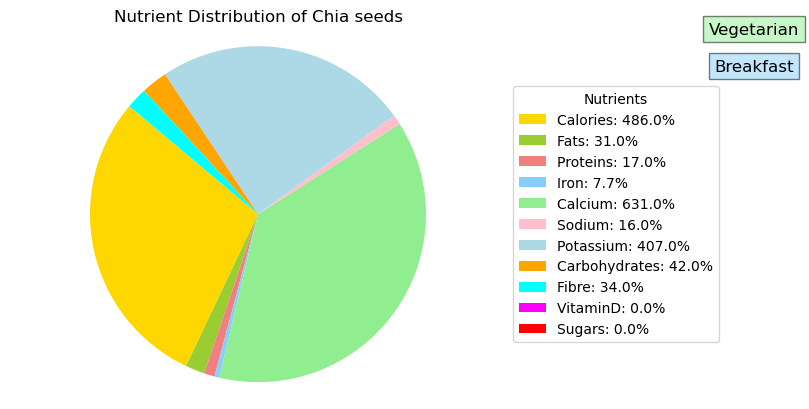

c:\Users\Gyatri C Gide\anaconda3\envs\goku\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Chia seeds


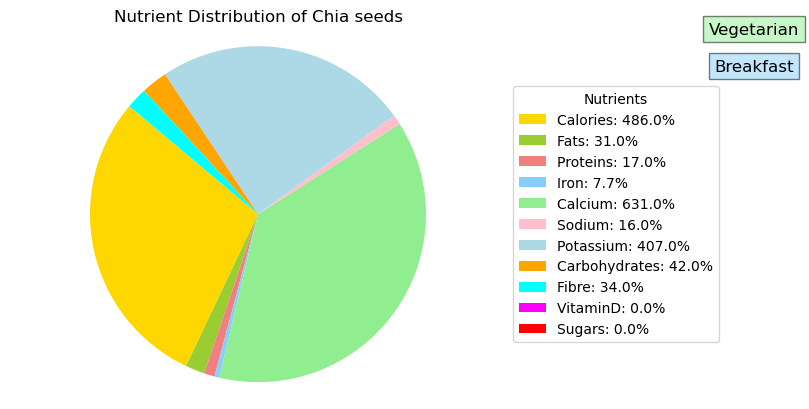

Chocolate milk


c:\Users\Gyatri C Gide\anaconda3\envs\goku\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


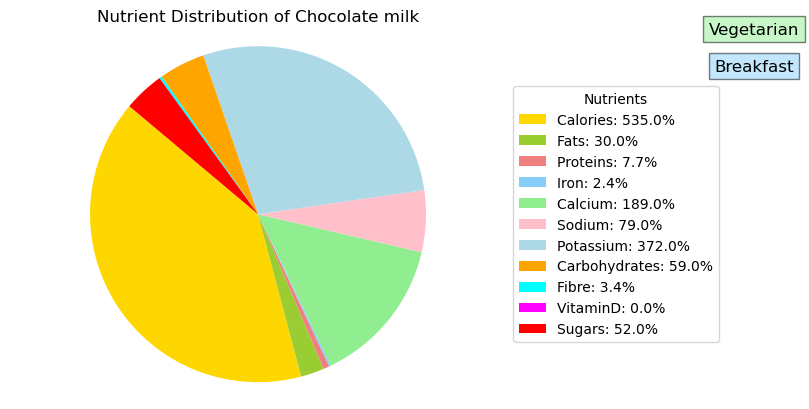

Almonds


c:\Users\Gyatri C Gide\anaconda3\envs\goku\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


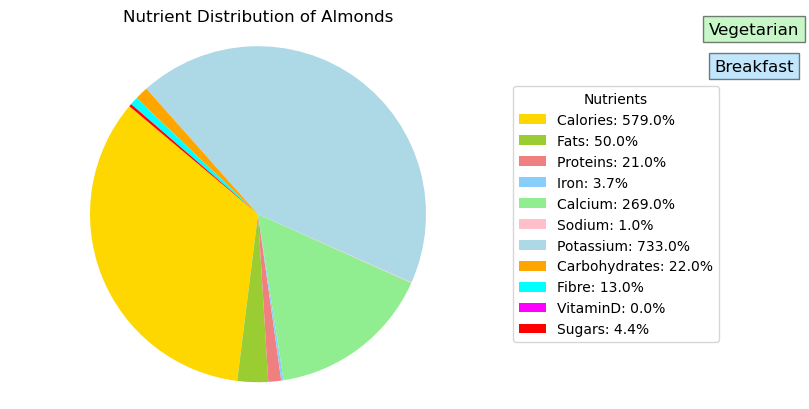

c:\Users\Gyatri C Gide\anaconda3\envs\goku\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Bagels made in wheat


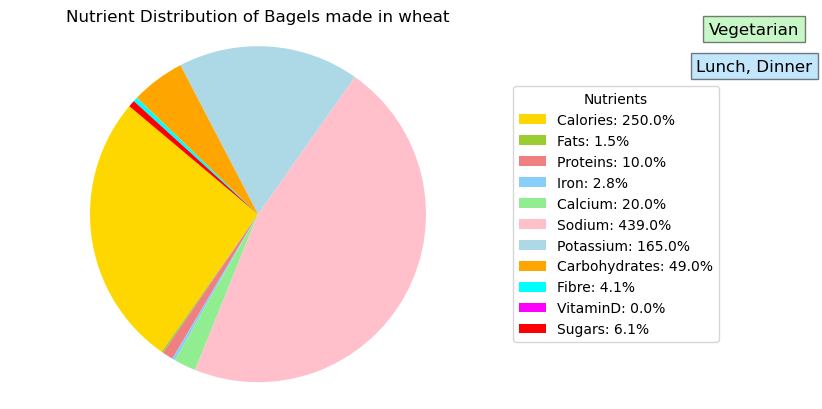

c:\Users\Gyatri C Gide\anaconda3\envs\goku\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Chia seeds


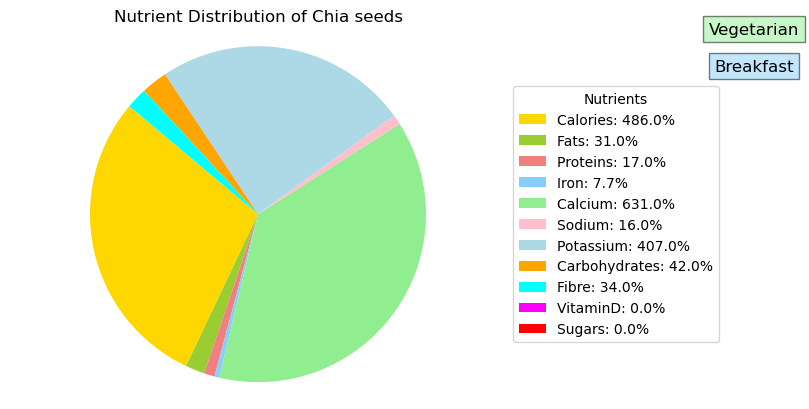

c:\Users\Gyatri C Gide\anaconda3\envs\goku\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Chia seeds


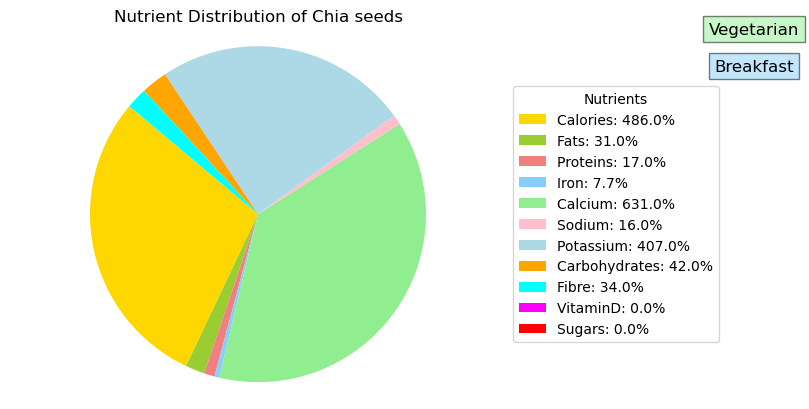

Chocolate Icecream


c:\Users\Gyatri C Gide\anaconda3\envs\goku\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


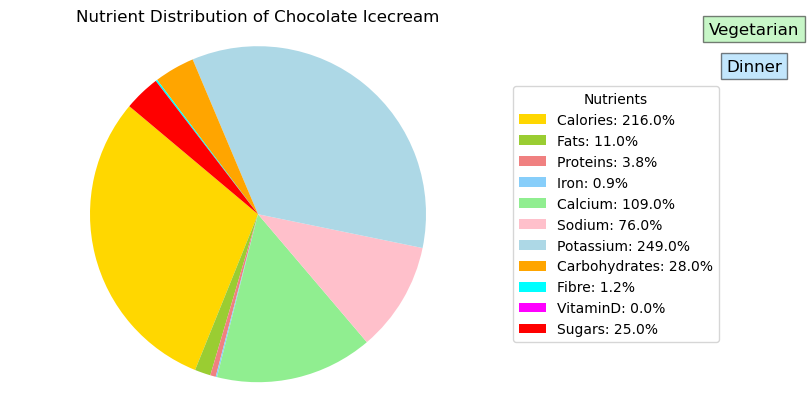

c:\Users\Gyatri C Gide\anaconda3\envs\goku\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Almonds


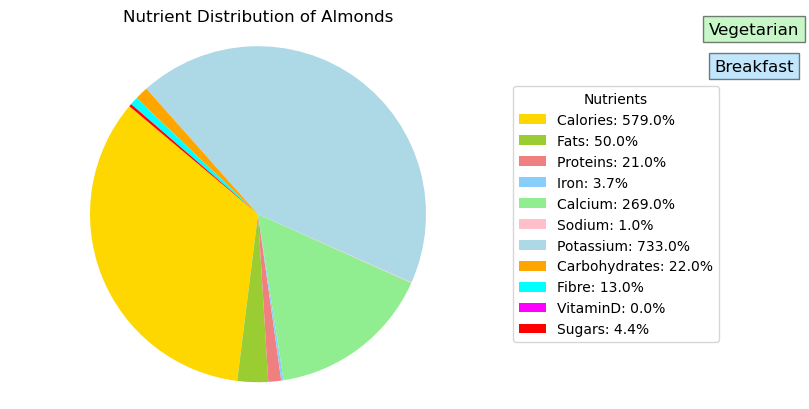

c:\Users\Gyatri C Gide\anaconda3\envs\goku\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Protein Powder


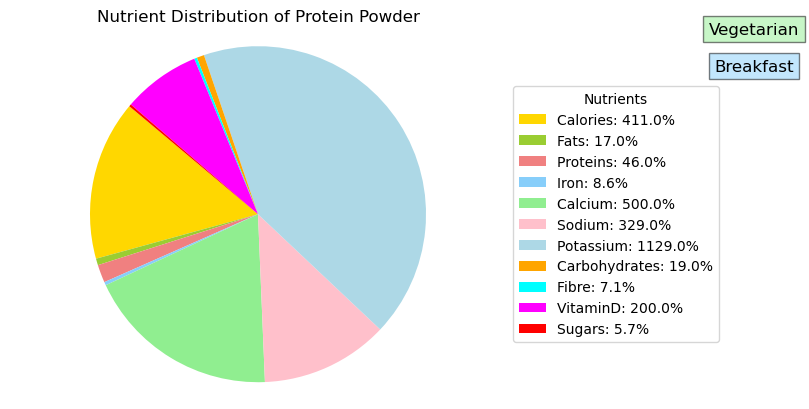

In [107]:
import matplotlib.pyplot as plt
from fuzzywuzzy import process

def create_pie_chart(food_df, food_item):
    # Perform fuzzy string matching to find the closest match
    match = process.extractOne(food_item, food_df['Food_items'])
    if match[1] >= 80:  # Adjust the threshold as needed
        food_item = match[0]  # Use the closest match
        item_row = food_df[food_df['Food_items'] == food_item]
        
        # Nutrient labels and sizes
        labels = ['Calories', 'Fats', 'Proteins', 'Iron', 'Calcium', 'Sodium',
                  'Potassium', 'Carbohydrates', 'Fibre', 'VitaminD', 'Sugars']
        sizes = item_row[labels].values[0]
        
        # Colors for the pie chart
        colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen',
                  'pink', 'lightblue', 'orange', 'cyan', 'magenta', 'red']
        
        # Create pie chart
        fig, ax = plt.subplots()
        wedges, _, _ = ax.pie(sizes, colors=colors, autopct='', startangle=140, textprops=dict(color="black"))
        
        # Add legend next to the pie chart
        ax.legend(wedges, [f'{label}: {size:.1f}%' for label, size in zip(labels, sizes)], title="Nutrients", loc="center left", bbox_to_anchor=(1, 0.5))
        
        # Include information about whether the food item is vegetarian or non-vegetarian
        veg_nonveg = item_row['VegNovVeg'].values[0]
        if veg_nonveg == 0:
            veg_label = 'Vegetarian'
        else:
            veg_label = 'Non-Vegetarian'
        plt.text(1.5, 1.0, f'{veg_label}', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=12, bbox=dict(facecolor='lightgreen', alpha=0.5))
        
        # Include information about meal type (breakfast, lunch, or dinner)
        meal_type = ''
        if item_row['Breakfast'].values[0] == 1:
            meal_type += 'Breakfast'
        if item_row['Lunch'].values[0] == 1:
            if meal_type:
                meal_type += ', '
            meal_type += 'Lunch'
        if item_row['Dinner'].values[0] == 1:
            if meal_type:
                meal_type += ', '
            meal_type += 'Dinner'
        plt.text(1.5, 0.9, f'{meal_type}', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=12, bbox=dict(facecolor='lightskyblue', alpha=0.5))
        
        # Equal aspect ratio ensures that pie is drawn as a circle
        ax.axis('equal')  
        
        # Title for the pie chart
        plt.title(f'Nutrient Distribution of {food_item}')
        
        # Show the pie chart
        plt.show()
    else:
        print("Food item not found or not similar enough in the dataset.")

def predict_food_names1(generated_sets, knn, food):
    # Initialize set to store predicted food names
    predicted_food_names1 = set()

    # Loop through each generated set
    for set_values in generated_sets:
        # Reshape the set_values to match the input format of the model
        X_input = np.array(set_values).reshape(1, -1)

        # Predict the index using the trained model
        predicted_index = knn.predict(X_input)

        # Get the predicted food name
        predicted_food_name1 = food.loc[predicted_index[0], 'Food_items']

        # Check if the predicted food name has not been written already
        if predicted_food_names1 not in predicted_food_names:
            # Write the predicted food name
            print(f"{predicted_food_name1}")
            
            # Create pie chart for the predicted food item
            create_pie_chart(food, predicted_food_name1)

            # Add the food name to the set of predicted food names
            predicted_food_names.add(predicted_food_name1)
    
    return predicted_food_names

# Call the function to predict food names and create pie charts
predicted_food_names1 = predict_food_names1(generated_sets, knn, food)


finding dishes from this food

In [101]:
# Function to search for a word in the description of each food item
def search_word_in_descriptions(word, df):
    # Initialize list to store results
    results = []

    # Loop through each food item in the DataFrame
    for food_name in df['Name']:
        # Get the description of the food item using the get_description function
        description = get_description(food_name)
        
        # Check if the word is found in the description
        if word in description.lower():
            # If found, append the food name to the results list
            results.append(food_name)
        else:
            # If not found, append the word itself to the results list
            results.append(word)
    
    return results

issues 
1) not printing the dishes list of 2nd dataset food item from predicted item
2) filtering of veg nonveg when user select opt
3) disease it not at all working so will use api at last or discard the opt

workdone
1) clustering issue sort
2) set generation on body parameters
3) prediction of food ingredients from dataset1 and their piechart
4) allergies
5) description of food item 

In [131]:
# Convert the set of predicted food names to an array
predicted_food_array = list(predicted_food_names)

# Assuming `search_word_in_descriptions` is a function that searches for food names in descriptions
# and `food` is the keyword you're searching for.
search_results = search_word_in_descriptions(predicted_food_array, df)

print("Search Results:")
for food_name, result in zip(predicted_food_array, search_results):
    print(f"{food_name}: {result}")


TypeError: 'in <string>' requires string as left operand, not list

In [132]:
# Convert the set of predicted food names to an array
predicted_food_array = list(predicted_food_names)

    # Assuming search_word_in_descriptions is a function that searches for a word in descriptions
# and returns a list of boolean values indicating whether the word is found in each description.

# Iterate over each predicted food name and search for it in descriptions
search_results = []
for food_name in predicted_food_array:
    results = search_word_in_descriptions(food_name, df)
    search_results.append(results)

print("Search Results:")
for food_name, result in zip(predicted_food_array, search_results):
    print(f"{food_name}: {result}")



Search Results:
Chocolate Icecream: ['Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecream', 'Chocolate Icecre

In [117]:
import random

def ingredient_cluster_search_food(ingredient_to_search, food, df):
    matched_food_names = find_similar_cluster_names(ingredient_to_search, food, df)
    print("Matched Food Names:")
    matched_food_set = set()  # Set to store unique matched food names
    for food_name in matched_food_names:
        description = get_description(food_name)
        if description and ingredient_to_search.lower() in description.lower():
            matched_food_set.add(food_name)

    # Shuffle the matched food set and select the first 10 items
    shuffled_food_items = list(matched_food_set)
    random.shuffle(shuffled_food_items)
    
    if len(shuffled_food_items) <= 10:
        for food_item in shuffled_food_items:
            print(food_item)
    else:
        random_food_items = shuffled_food_items[:10]
        print('-' * 20)
        for food_item in random_food_items:
            print(food_item)



In [125]:
# Convert the set of predicted food names to an array
predicted_food_array = list(predicted_food_names)

# Search for food based on the predicted food names
ingredient_cluster_search_food(predicted_food_array, food, df)

AttributeError: 'set' object has no attribute 'lower'